<p align="left">
  <a href="https://colab.research.google.com/github/fernandoarcevega/AI_Workshop/blob/main/Day_1/01_Linear_regression/01_linreg_pckg.ipynb" target="_parent">
    <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab" width="200">
  </a>
</p>

In [1]:
###############################################
# Author 1: Wilfrido Gómez-Flores (CINVESTAV) #
# Author 2: Fernando Arce-Vega (CIO)          #
# e-mail 1: wilfrido.gomez@cinvestav.mx       #
# e-mail 2: farce@cio.mx                      #
# Date:     nov/03/2025                       #
# Subject:  Linear regression                 #
###############################################

In [2]:
# Libraries
import numpy as np                                # Numerical array operations
from sklearn.linear_model import LinearRegression # Machine learning model
import pandas as pd                               # Data manipulation/analysis
import matplotlib.pyplot as plt                   # Data plotting/visualization
from mpl_toolkits.mplot3d import Axes3D           # 3D plotting tools

In [3]:
# Load dataset
# Path to dataset
path = 'https://raw.githubusercontent.com/fernandoarcevega/AI_Workshop/main/datasets/reg_data.csv'
T = pd.read_csv(path)                                       # Loading dataset
data = T.values                                             # Converting to numpy
X = data[:, [0, 1]]                                         # Features
Y = data[:, 2].reshape(-1, 1)                               # Target variable
vnames = T.columns                                          # Feature names

In [4]:
# Check feature and targets shapes and feature names
print(f'Features shape: {X.shape}')
print(f'Targets shape:  {Y.shape}')
print(f'Feature names:  {list(vnames)}')

Features shape: (20, 2)
Targets shape:  (20, 1)
Feature names:  ['age', 'experience', 'income']


System of equations for **simple linear regression**, for $w_1$ and $w_0$:


$$w_1 = \frac{\sum_{i=1}^{n} y_i x_i - \bar{y} \sum_{i=1}^{n} x_i}{\sum_{i=1}^{n} x_i^2 - \bar{x} \sum_{i=1}^{n} x_i} \quad \text{and} \quad w_0 = \bar{y} - w_1 \bar{x},$$

where $\bar{x}$ and $\bar{y}$ are the mean values of $x$ and $y$, respectively.

System of equations for **multiple linear regression**:


$$ \mathbf{w} = (X^T X)^{-1} X^T \mathbf{y}. $$

The term $(X^T X)^{-1} X^T$ is the pseudoinverse of X, denoted as $X^+$; thus, the weight vector can be rewritten as

$$ \mathbf{w} = X^+ \mathbf{y}. $$

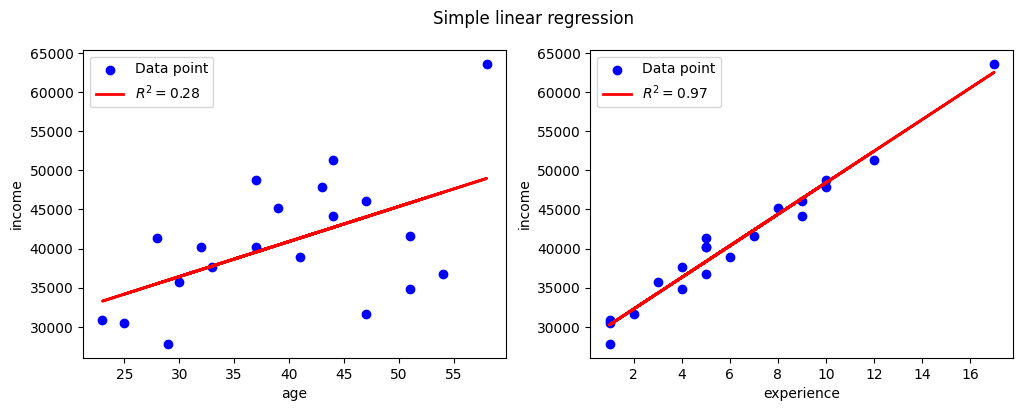

In [5]:
# Simple linear regression
plt.figure(figsize=(12, 4), facecolor='w')

for i in range(2):

    # Instantiate model
    model = LinearRegression()
    X_train = X[:, i].reshape(-1, 1)

    # Train model
    model.fit(X_train, Y)

    # Prediction
    Yhat = model.predict(X_train)

    # Coefficient of determination
    R2 = model.score(X_train, Y)

    # Plot
    plt.subplot(1, 2, i + 1)
    plt.scatter(X[:, i], Y, c='b', marker='o', label='Data point')
    plt.plot(X[:, i], Yhat, linewidth=2, color='r', label=f'$R^2={R2:.2f}$')
    plt.xlabel(vnames[i])
    plt.ylabel(vnames[2])
    plt.legend(loc='upper left')
    plt.box(True)
    plt.suptitle('Simple linear regression')

ŷ = 31261.68985410128 -99.19535546105377*x1 + 2162.404191924113*x2 



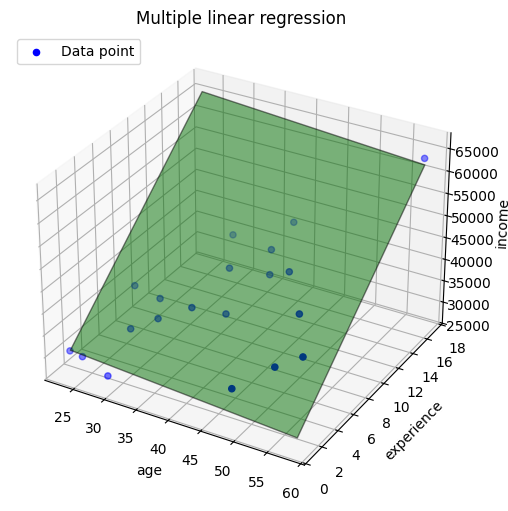

In [6]:
# Multiple linear regression
# Instantiate model
model = LinearRegression()

# Train model
model.fit(X, Y)

# Model parameters
W0 = model.intercept_[0]
W = model.coef_
W1 = W[0, 0]
W2 = W[0, 1]

# Coefficient of determination
R2 = model.score(X, Y)

# Creates trend plane
x1fit = [np.min(X[:, 0]), np.max(X[:, 0])]
x2fit = [np.min(X[:, 1]), np.max(X[:, 1])]
X1FIT, X2FIT = np.meshgrid(x1fit, x2fit)

# Prediction
YFIT = W0 + W1*X1FIT + W2*X2FIT

# Plot
fig = plt.figure(figsize=(12, 6), facecolor='w')
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], Y[:, 0], c='b', marker='o', label='Data point')
ax.plot_surface(X1FIT, X2FIT, YFIT, alpha=0.5, color='g', edgecolor='k')
ax.legend(loc='upper left')
ax.set_xlabel(vnames[0])
ax.set_ylabel(vnames[1])
ax.set_zlabel(vnames[2])
ax.set_title('Multiple linear regression')
print(f'ŷ = {W0} {W1}*x1 + {W2}*x2 \n')